<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/U1S1M2_Andrew_Rust_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

In [0]:
print("hello world!")

hello world!


# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

In [0]:
import pandas as pd

In [0]:
source_url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv"

In [0]:
iowa_df = pd.read_csv(source_url)


In [4]:
# first few rows
iowa_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
iowa_df.shape

(1460, 81)

In [7]:
# describe
iowa_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [8]:
# column types
pd.set_option('display.max_rows', 100)
# There are 81 columns so 100 will show all of them
# However let's limit them to 7.
iowa_df.dtypes[:7]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
dtype: object

In [9]:
# Look at the first ten rows of the 'BedroomAbvGr' column.
# Looks like integers to me!
# Double set of brackets means it's a list and filters out data frames.
# With formatting.
iowa_df[['BedroomAbvGr', 'Fireplaces']].sample(4)

,BedroomAbvGr,Fireplaces
222,3,1
188,2,2
563,4,1
380,3,1


In [10]:
# Single set of brackets means series.
iowa_df[['Fireplaces']].sample(4)

,Fireplaces
1127,1
939,2
1433,1
23,1


In [11]:
# Another way to call columns: dot method
# DEPRECATED.
iowa_df.Fireplaces.sample(4)

865     0
816     1
906     1
1155    1
Name: Fireplaces, dtype: int64

In [0]:
iowa_df['fire places are nice and hot'] = iowa_df['Fireplaces']

In [13]:
iowa_df[['fire places are nice and hot', 'Fireplaces', 'BedroomAbvGr']].head(2)

,fire places are nice and hot,Fireplaces,BedroomAbvGr
0,0,0,3
1,1,1,3


In [14]:
iowa_df.Fireplaces.head(2)

0    0
1    1
Name: Fireplaces, dtype: int64

In [0]:
# WILL NOT work Name space collision.
iowa_df.fire places are nice and hot.head(2)

SyntaxError: ignored

In [15]:
# Look at the first ten rows of the 'BedroomAbvGr' column.
# Floats
iowa_df['LotFrontage'].head(2)

0    65.0
1    80.0
Name: LotFrontage, dtype: float64

In [16]:
# Look at the first ten rows of the 'BedroomAbvGr' column.
# SHOWS 259 values are missing values Nan's are of the float type.
# Not A Number.
# dropna=False means show me those missing values.
iowa_df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
import numpy as np

In [18]:
type(np.nan)

float

In [19]:
# How much missing data?
# Null values are booleans.
# Chain methods together.
iowa_df['LotFrontage'].isnull().sum()

259

In [0]:
# Now drop missing data.
# inplace=True will pass this into the new column by overwriting it.
iowa_df['LotFrontage'].dropna(inplace=True)

In [21]:
# Now how much missing data?
iowa_df['LotFrontage'].isnull().sum()

0

In [0]:
# Different ways you can deal with missing data.
# Important will save you from errors.
# Impute it with the average of the data values is one way.

In [23]:
# Make a smaller data frame.
# Best Practice is to add a copy method makes sure new data frame does not inherit changes made to original df.
# SF abreviated Square Footage.
small_df = iowa_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_df.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
1242,1053,1173,0,170000
23,1040,1060,0,129900
714,725,725,754,130500


In [24]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset
small_df['TotalSF'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df['2ndFlrSF']
# Using bracket syntax to make a new 'TotalSquareFootage' column
small_df.head(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706


In [25]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
small_df['PricePerSF'] = small_df['SalePrice'] / small_df['TotalSF']
small_df.head(3)
# helps compare prices of homes easier!

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235


In [26]:
# Crosstabs
iowa_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
# Looking for some categorical columns?
# Clearly these are not numeric so good but Sale condition looks good.
iowa_df[['LotShape', 'Alley', 'Street', 'SaleCondition']].head()

,LotShape,Alley,Street,SaleCondition
0,Reg,NaN,Pave,Normal
1,Reg,NaN,Pave,Normal
2,IR1,NaN,Pave,Normal
3,IR1,NaN,Pave,Abnorml
4,IR1,NaN,Pave,Normal


In [28]:
# values of sale condition
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [29]:
# np.where is for re-coding into a binary value.
iowa_df['NormalCondition'] = np.where(iowa_df['SaleCondition']=='Normal', 'Yes', 'No')
iowa_df['NormalCondition'].value_counts()
# Created a new categorical variable that's either Normal or Everything else.

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [30]:
# value counts of a categorical variable
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
# Map this from four down to 3 values
# Map is for when you are re-coding into more than two values (3 here) unlike np.where.
iowa_df['LotShape3']=iowa_df['LotShape'].map({'Reg':'Regular',
                                              'IR1':'Irregular',
                                              'IR2':'Other',
                                              'IR3':'Other'})
# This is a new column but the original column has not actually changed
# IT was a good idea to use a different variable name to preserver original df. 

In [32]:
# Values
iowa_df['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [33]:
iowa_df['Neighborhood'].value_counts().head(6)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Name: Neighborhood, dtype: int64

In [34]:
# Created a new column where every single row is All others.
iowa_df['top_neighbors']='All others'
iowa_df.loc[iowa_df['Neighborhood']=='NAmes', 'top_neighbors']='north ames neighbors'
# College Creek becomes creek neighbors.
iowa_df.loc[iowa_df['Neighborhood']=='CollgCr', 'top_neighbors']='creek neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='Gilbert', 'top_neighbors']='gilbert neighbors'
iowa_df['top_neighbors'].value_counts()
# .loc method allows us to create a new variable and map in only specific variables where everyone else goes 
# into a catch all.

All others              1006
north ames neighbors     225
creek neighbors          150
gilbert neighbors         79
Name: top_neighbors, dtype: int64

In [35]:
# crosstab!
# 4 X 3 data frame clearly majority of totals fall into the all others
# north ames neighborhood 66 irregular lots and 157 regular etc.
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All others,312,27,667
creek neighbors,53,11,86
gilbert neighbors,53,11,15
north ames neighbors,66,2,157


In [0]:
# Gives a grand total of all them added together.
# margins
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'], margins=True)
# margins equal to true sums everything up on the bottom and top right.

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All others,312,27,667,1006
creek neighbors,53,11,86,150
gilbert neighbors,53,11,15,79
north ames neighbors,66,2,157,225
All,484,51,925,1460


In [0]:
# as proportions
# NORMALIZE gives proportions or percentages % of the whole on index as to say by rows
# 3 numbers in the first row add up to 1 or 100 percent as do all rows or indexes
# you can also normalize the columns to I believe
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'], normalize='index', margins=True)

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All others,0.310139,0.026839,0.663022
creek neighbors,0.353333,0.073333,0.573333
gilbert neighbors,0.670886,0.139241,0.189873
north ames neighbors,0.293333,0.008889,0.697778
All,0.331507,0.034932,0.633562


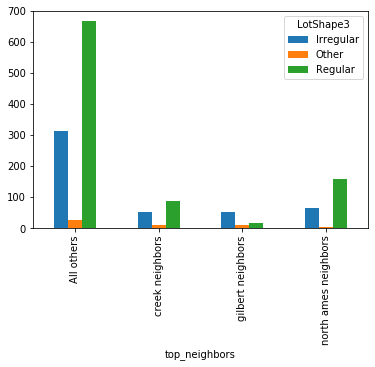

In [0]:
# display that
# North ames neighborhood has more regular plots (in green) and Gilbert neighborhood has more irregular
# Cross tab as a paired bar chart
myresults = pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])
myresults.plot(kind='bar');

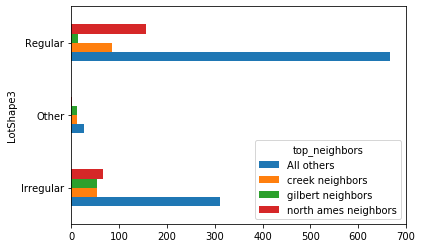

In [0]:
# Flip that
# barh creates horrizontal chart
myresults = pd.crosstab(iowa_df['LotShape3'], iowa_df['top_neighbors'])
myresults.plot(kind='barh');

## LOADING A MORE REAL WORLD DATA FRAME THAT YOU'LL GET AT A JOB OR PROJECT (more difficult)

In [36]:
# !(bang 'w'get)

! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-03-15 01:26:18--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [        <=>         ]  21.71M  1.84MB/s    in 12s     

2020-03-15 01:26:30 (1.82 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22763850]



In [37]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [38]:
# Read it into pandas as a CSV has to be a string
# EVERYTHING IS BOLDED BECAUSE IT THINKS ALL OF IT IS INDEX
loans_df = pd.read_csv('LoanStats_2018Q4.csv')
loans_df.head(7)
# something funky is going on over at the front with index where all the values that should be columns
# couple of additional rows that aren't reading at the top and bottom

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status        pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid         n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100   

In [39]:
# header = 1 means that the initial row is the header not all of it.
# The last two rows are not expected to be part of the df so we need to skip them!
loans_df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
loans_df.tail(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128277,NaN,NaN,5000,5000,5000.0,36 months,16.14%,176.14,C,C4,Oncology Medical Assistant,3 years,MORTGAGE,46400.0,Source Verified,Oct-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,338xx,FL,16.85,0,Nov-2003,0,29.0,NaN,10,0,6722,62.2%,18,w,0.00,0.00,5436.02672,5436.03,...,100.0,0,0,161585,19979,3000,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128278,NaN,NaN,5600,5600,5600.0,36 months,13.56%,190.21,C,C1,NaN,NaN,RENT,15600.0,Not Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,836xx,ID,15.31,0,Aug-2012,0,NaN,97.0,9,1,5996,34.5%,11,w,3387.58,3387.58,3032.81000,3032.81,...,25.0,1,0,17400,5996,8600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08000,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82000,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51000,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52000,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-20

In [40]:
# We can fix the header problem by using the 'skiprows' parameter instead of header = 1 skiprows works the same way
# engine python code helps it run smoother because it wants to use the c engine
loans_df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
loans_df.tail(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128277,NaN,NaN,5000,5000,5000.0,36 months,16.14%,176.14,C,C4,Oncology Medical Assistant,3 years,MORTGAGE,46400.0,Source Verified,Oct-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,338xx,FL,16.85,0,Nov-2003,0,29.0,NaN,10,0,6722,62.2%,18,w,0.00,0.00,5436.02672,5436.03,...,100.0,0,0,161585,19979,3000,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128278,NaN,NaN,5600,5600,5600.0,36 months,13.56%,190.21,C,C1,NaN,NaN,RENT,15600.0,Not Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,836xx,ID,15.31,0,Aug-2012,0,NaN,97.0,9,1,5996,34.5%,11,w,3387.58,3387.58,3032.81000,3032.81,...,25.0,1,0,17400,5996,8600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08000,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82000,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51000,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52000,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-20

In [41]:
# Sum null values by column
loans_df.isnull().sum()

id                       128284
member_id                128284
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_status        127599
settlement_date          127599
settlement_amount        127599
settlement_percentage    127599
settlement_term          127599
Length: 144, dtype: int64

In [42]:
# ascending is = false to see which of the columns have the largest set of null values
# pd.set_option('display.max_rows', 100)
# commented out code above is trying to show 100 rows but has a typo
loans_df.isnull().sum().sort_values(ascending=False)

id                                            128284
desc                                          128284
member_id                                     128284
url                                           128284
orig_projected_additional_accrued_interest    128025
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [43]:
# Look at the first 10 values of the int_rate column
loans_df['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     10.33%
8     23.40%
9     10.72%
Name: int_rate, dtype: object

In [44]:
# Look at a specific value from the int_rate column
loans_df['int_rate'][3]

' 14.47%'

In [45]:
# confirm that
# TO be able to perform computation on it can't be a string needs to change to float!
# NEEDS data cleaning!
type(loans_df['int_rate'][3])

str

In [0]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
int_rate = ' 14.47%'

In [47]:
# remove leading space
# built in str function removes leading space
int_rate.strip()

'14.47%'

In [48]:
# remove percent by passing an option argument
int_rate.strip('%')

' 14.47'

In [49]:
# remove both leading space and percent by chaining methods
int_rate.strip().strip('%')

'14.47'

In [50]:
# "Cast" the string value to a float
float('14.47') 

14.47

In [51]:
# put it all together
float(int_rate.strip().strip('%')) 

14.47

In [52]:
# check our work
type(float(int_rate.strip().strip('%')) )

float

In [0]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.

def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [54]:
# Test out our function by calling it on our example
myfunc(int_rate)

14.47

In [60]:
# is the data type correct?
type(myfunc(int_rate))

float

In [0]:
# creating a blank empty list
new_list = []

In [0]:
# for loop:
for cell in loans_df['int_rate']:
  new_list.append(myfunc(cell))

In [0]:
# look at first 10 values of that list:
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 10.33, 23.4, 10.72]

In [57]:
# compare to original values
list(loans_df['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%',
 ' 10.72%']

In [63]:
# convert that list to a new column
# CAN'T just set it = to list it needs to be a pandas series or object
# every column is a series so needs to be like with like
loans_df['int_rate_cleaned']= pd.Series(new_list)
loans_df[['int_rate', 'int_rate_cleaned']].head()

,int_rate,int_rate_cleaned
0,16.14%,16.14
1,11.80%,11.80
2,11.31%,11.31
3,14.47%,14.47
4,27.27%,27.27


In [0]:
# THIS IS JUST FOR CURIOSITY SAKE to create it NOT as a panda series 
# convert that list to a new column (not as list!)
loans_df['int_rate_cleaned_X']= new_list
loans_df[['int_rate', 'int_rate_cleaned_X']].head()

,int_rate,int_rate_cleaned_X
0,16.14%,16.14
1,11.80%,11.80
2,11.31%,11.31
3,14.47%,14.47
4,27.27%,27.27


In [0]:
# WILL CREATE THE SAME dtype if it's a series too.
# What type of data is held in our new column?
loans_df[['int_rate', 'int_rate_cleaned_X']].dtypes

int_rate               object
int_rate_cleaned_X    float64
dtype: object

In [0]:
# improve all of this code with the .apply function!
# .apply method is applying the function to create a new column
# has all the same values as the first column int_rate_cleaned
loans_df['int_rate_cleaned2'] = loans_df['int_rate'].apply(myfunc)
loans_df[['int_rate', 'int_rate_cleaned', 'int_rate_cleaned2']].head()

,int_rate,int_rate_cleaned,int_rate_cleaned2
0,16.14%,16.14,16.14
1,11.80%,11.80,11.80
2,11.31%,11.31,11.31
3,14.47%,14.47,14.47
4,27.27%,27.27,27.27


## Another column needs data cleaing.

In [74]:
# look at the top 20 rows
# at least one missing value NaN
# Some are all caps.
loans_df['emp_title'].head(20)

0                      Sale Consultant
1                            Educator 
2                Accounts Examiner III
3                              teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire builder
7                               Driver
8                               BANKER
9                     Business Analyst
10                            OPERATOR
11                    Shift Supervisor
12          Program Support Assistant 
13              Reference/YA Librarian
14                      Senior manager
15    Sr. Vice President -Risk Manager
16                                 NaN
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
Name: emp_title, dtype: object

In [75]:
# Look at the top 20 employment titles
# dropna = False makes sure to include NaN's and of course it has the highest value counts next to teacher.
loans_df['emp_title'].value_counts(dropna=False)[:20]

NaN                   20922
Teacher                2088
Manager                1771
Registered Nurse        950
Driver                  924
RN                      724
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          520
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [76]:
# How many different unique employment titles are there currently?
# len() of anything will tell us the number of components
# unique will tell us the amounts of different kinds of titles of employement
len(loans_df['emp_title'].unique())

43852

In [77]:
# another way to do what was just done above
loans_df['emp_title'].nunique()

43851

In [78]:
# How often is the employment_title null?
# Lousy data entry
loans_df['emp_title'].isnull().sum()

20922

In [0]:
# FIRST WE TRY IT SMALL THEN WE TRY IT ON A BIGGER SCALE
# Create some examples that represent the cases that we want to clean up
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [80]:
# do that same function in individual steps
# isinstance presents a boolean to be evaluated.
print(type('Supervisor'))
isinstance('Supervisor', str)

<class 'str'>


True

In [81]:
# do that same function in individual steps
print(type('Supervisor'))
isinstance('Supervisor', float)

<class 'str'>


False

In [82]:
# .title() WILL CAPITALIZE ONLY THE FIRST LETTER OF THE WORD
# what about the strip? REMOVES THE LEADING SPACE
' superVIsor'.title().strip()

'Supervisor'

In [0]:
# IN A REAL WORLD FUNCTION YOU MIGHT HAVE A WHOLE BUNCH OF IF THEN STATEMENTS
# Write a function to clean up these use cases and increase uniformity.
def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return "unknown"

In [84]:
# test our function
clean_title(' superVIsor')

'Supervisor'

In [85]:
# create a for loop:
# Start with an empty list but won't be empty when we're done with it.
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [86]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.
[clean_title(jobtitle) for jobtitle in   examples]

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [0]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column
# clean title function applying it to emp_title and then puting them into a new column emp_title_cleaned

loans_df['emp_title_cleaned'] = loans_df['emp_title'].apply(clean_title)

In [88]:
# check our work
loans_df[['emp_title', 'emp_title_cleaned']].sample(10)

,emp_title,emp_title_cleaned
38896,NaN,unknown
79266,Sr. Cyber Security Engineer,Sr. Cyber Security Engineer
121883,NaN,unknown
71308,Comp Sys Analyst,Comp Sys Analyst
96022,Eligibility Worker II,Eligibility Worker Ii
30785,Department manager,Department Manager
111091,Business Specialist,Business Specialist
81011,Banking Specialist II - Tech Support,Banking Specialist Ii - Tech Support
100098,Butcher,Butcher
49887,IT Specialist,It Specialist


In [89]:
# WILL GIVE YOU THE TOTAL NUMBER OF EMPLOYMENT TITLES
#.unique will give you the actual titles
loans_df['emp_title_cleaned'].nunique()

34877

In [99]:
# Look at the top 20 employment titles
loans_df['emp_title_cleaned'].value_counts().head(20)

unknown               20922
Teacher                2553
Manager                2393
Registered Nurse       1416
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      832
Office Manager          804
Sales                   803
General Manager         791
Project Manager         720
Owner                   623
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   424
Technician              420
Engineer                411
Name: emp_title_cleaned, dtype: int64

In [92]:
# How many different unique employment titles are there currently?
loans_df['emp_title_cleaned'].nunique()

34877

In [93]:
# REDUCING THAT LARGE 34877 number to a smaller couple of numbers
# recoding a categorical variable
# .loc function 
loans_df['new_emp_title']='All others'
loans_df.loc[loans_df['emp_title']=='Manager','new_emp_title' ]='Manager'
loans_df.loc[loans_df['emp_title']=='Teacher','new_emp_title' ]='Teacher'
loans_df['new_emp_title'].value_counts()

All others    124425
Teacher         2088
Manager         1771
Name: new_emp_title, dtype: int64

In [94]:
# How often is the employment_title null (NaN)?
loans_df['emp_title_cleaned'].isnull().sum()

0

In [95]:
# ANY COLUMN ENDS IN a d means it's a date column
# list all columns
loans_df.columns[:30]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record'],
      dtype='object')

# MAKE last_pymnt_d_month and last_pymnt_d_year columns

In [0]:
nan_value = float('Nan')
loans_df['last_pymnt_d_month'] = nan_value

In [0]:
loans_df['last_pymnt_d_year'] = nan_value

In [0]:
# I created the columns and just put NaN values in them.
# Wasn't sure what values were being asked for.
loans_df['last_pymnt_d_year'].head(3)

0   NaN
1   NaN
2   NaN
Name: last_pymnt_d_year, dtype: float64

# MAKE A COLUMN NAMED loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

In [0]:
import numpy as np
loans_df['loan_status'].value_counts()

Current               92485
Fully Paid            24821
Charged Off            6766
Late (31-120 days)     2210
In Grace Period        1405
Late (16-30 days)       486
Default                 111
Name: loan_status, dtype: int64

In [0]:
# I tried using the or statement here and it didn't want to take.
# for example:
# loans_df['loan_status_is_great'] = np.where(loans_df['loan_status']=='Current' or 'Fully Paid', 1, 0)
# doesn't work but the below does of course.
loans_df['loan_status_is_great'] = np.where(loans_df['loan_status']=='Current', 1, 0)

In [0]:
loans_df['loan_status_is_great'].value_counts()

1    92485
0    35799
Name: loan_status_is_great, dtype: int64

# MODIFY the emp_title column to replace titles with 'Other' if the title is not in the top 20.

In [100]:
loans_df['emp_title_cleaned'].head(25)

0                      Sale Consultant
1                             Educator
2                Accounts Examiner Iii
3                              Teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire Builder
7                               Driver
8                               Banker
9                     Business Analyst
10                            Operator
11                    Shift Supervisor
12           Program Support Assistant
13              Reference/Ya Librarian
14                      Senior Manager
15    Sr. Vice President -Risk Manager
16                             unknown
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
20                             Teacher
21                     Program Manager
22                           Conductor
23                             Printer
24                                Lmsw
Name: emp_title_cleaned, 

In [101]:
loans_df['emp_title_cleaned'].value_counts()

unknown                     20922
Teacher                      2553
Manager                      2393
Registered Nurse             1416
Driver                       1258
                            ...  
Employer                        1
Isc                             1
Cook Prep                       1
Digital Media Supervisor        1
Enginering                      1
Name: emp_title_cleaned, Length: 34877, dtype: int64

In [102]:
# # Look at the top 20 employment titles
# dropna = False makes sure to include NaN's and of course it has the highest value counts next to teacher.
loans_df['emp_title_cleaned'].value_counts(dropna=False)[:20]

unknown               20922
Teacher                2553
Manager                2393
Registered Nurse       1416
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      832
Office Manager          804
Sales                   803
General Manager         791
Project Manager         720
Owner                   623
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   424
Technician              420
Engineer                411
Name: emp_title_cleaned, dtype: int64

In [73]:
# Created a new column where every single row is Others.
loans_df['top_20_emp']='Others'
loans_df.loc[loans_df['emp_title']=='NaN', 'top_20_emp']='NaN'
loans_df.loc[loans_df['emp_title']=='Teacher', 'top_20_emp']='Teacher'
loans_df.loc[loans_df['emp_title']=='Manager', 'top_20_emp']='Manager'
loans_df.loc[loans_df['emp_title']=='Registered Nurse', 'top_20_emp']='NaN'
loans_df.loc[loans_df['emp_title']=='Driver', 'top_20_emp']='Teacher'
loans_df.loc[loans_df['emp_title']=='RN', 'top_20_emp']='Manager'
loans_df.loc[loans_df['emp_title']=='Supervisor', 'top_20_emp']='NaN'
loans_df.loc[loans_df['emp_title']=='Sales', 'top_20_emp']='Teacher'
loans_df.loc[loans_df['emp_title']=='Project Manager', 'top_20_emp']='Manager'
loans_df.loc[loans_df['emp_title']=='General Manager', 'top_20_emp']='NaN'
loans_df.loc[loans_df['emp_title']=='Office Manager', 'top_20_emp']='Teacher'
loans_df.loc[loans_df['emp_title']=='Owner', 'top_20_emp']='Manager'
loans_df.loc[loans_df['emp_title']=='Director', 'top_20_emp']='NaN'
loans_df.loc[loans_df['emp_title']=='Operations Manager', 'top_20_emp']='Teacher'
loans_df.loc[loans_df['emp_title']=='Truck Driver', 'top_20_emp']='Manager'
loans_df.loc[loans_df['emp_title']=='Nurse', 'top_20_emp']='NaN'
loans_df.loc[loans_df['emp_title']=='Engineer', 'top_20_emp']='Teacher'
loans_df.loc[loans_df['emp_title']=='Sales Manager', 'top_20_emp']='Manager'
loans_df.loc[loans_df['emp_title']=='Sales Manager', 'top_20_emp']='NaN'
loans_df.loc[loans_df['emp_title']=='manager', 'top_20_emp']='Teacher'
loans_df.loc[loans_df['emp_title']=='Supervisor', 'top_20_emp']='Manager'
loans_df['top_20_emp'].value_counts()
# .loc method allows us to create a new variable and map in only specific variables where everyone else goes 
# into a catch all.

Others     124425
Teacher      2088
Manager      1771
Name: top_20_emp, dtype: int64

# CONVERT THE TERM COLUMN FROM STRING TO INT

In [0]:
# Confident this worked beautifully.
loans_df['term'].head()

0     60 months
1     36 months
2     36 months
3     60 months
4     60 months
Name: term, dtype: object

In [0]:
loans_df['term'][3]

' 60 months'

In [0]:
type(loans_df['term'][3])

str

In [0]:
term_example = ' 60 months'

In [0]:
term_example.strip()

'60 months'

In [0]:
term_example.strip(' months')

'60'

In [0]:
term_example.strip().strip(' months')

'60'

In [0]:
int('60')

60

In [0]:
type(int(term_example.strip().strip(' months')))

int

In [0]:
def term_to_int(column_contents):
  return int(column_contents.strip().strip(' months'))

In [0]:
type(term_to_int(term_example))

int

In [0]:
term_list = []

In [0]:
for cell in loans_df['term']:
  term_list.append(term_to_int(cell))

In [0]:
term_list[:10]

[60, 36, 36, 60, 60, 36, 60, 36, 36, 36]

In [0]:
list(loans_df['term'][:10])

[' 60 months',
 ' 36 months',
 ' 36 months',
 ' 60 months',
 ' 60 months',
 ' 36 months',
 ' 60 months',
 ' 36 months',
 ' 36 months',
 ' 36 months']

In [0]:
loans_df['term_rate_cleaned'] = pd.Series(term_list)
loans_df[['term', 'term_rate_cleaned']].head()

,term,term_rate_cleaned
0,60 months,60
1,36 months,36
2,36 months,36
3,60 months,60
4,60 months,60


In [0]:
loans_df['term_rate_cleaned_X'] = term_list
loans_df[['term', 'term_rate_cleaned_X']].head()

,term,term_rate_cleaned_X
0,60 months,60
1,36 months,36
2,36 months,36
3,60 months,60
4,60 months,60


In [0]:
loans_df[['term', 'term_rate_cleaned_X']].dtypes

term                   object
term_rate_cleaned_X     int64
dtype: object

## ANY COLUMN ENDS WITH A _d means it's a date column!

In [0]:
# check out one column
loans_df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [0]:
# WE FIND OUT THERE ARE 4 date columns!
# as a for loop:
mylist = []
for col in loans_df.columns:
  if col.endswith('_d'):
    mylist.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
# as a list comprehension:
my_date_cols = [col for col in loans_df.columns if col.endswith('_d')]

In [0]:
loans_df['issue_d'].dtype

dtype('O')

In [0]:
print(loans_df['issue_d'][0])
type(loans_df['issue_d'][0])

Dec-2018


str

In [0]:
# PANDAS LET'S us convert a STR to a date
# infer_datetime_format=True
# CREATE a new_issue_d column to compare side by side!
# infer_datetime_format=True will infer the best format
# Takes the first day of the month
loans_df['new_issue_d'] = pd.to_datetime(loans_df['issue_d'], infer_datetime_format=True)

loans_df[['issue_d','new_issue_d']]

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01
...,...,...
128279,Oct-2018,2018-10-01
128280,Oct-2018,2018-10-01
128281,Oct-2018,2018-10-01
128282,Oct-2018,2018-10-01


In [0]:
#64 MEANS how many bits are used for storage
# check our work
type(loans_df['new_issue_d'][0])

print(loans_df['new_issue_d'].dtype)

datetime64[ns]


In [0]:
# .iloc method to cherrry pick the first row!
# includes hour minute and second which has been specified as midnight.
# We don't need all this information
loans_df['new_issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [0]:
# milliseconds and full hidden value using .values
loans_df['new_issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
# AN ACCESSOR is what preceedes a method it doesn't work by itself
# dt is the accessor we will be using here
# our new column here is the year
loans_df['year'] = loans_df['new_issue_d'].dt.year
# calling out the head method on all 3 of our columns
loans_df[['issue_d', 'new_issue_d', 'year']].sample(7)

,issue_d,new_issue_d,year
121050,Oct-2018,2018-10-01,2018
85633,Oct-2018,2018-10-01,2018
40965,Nov-2018,2018-11-01,2018
120460,Oct-2018,2018-10-01,2018
73388,Nov-2018,2018-11-01,2018
109630,Oct-2018,2018-10-01,2018
62637,Nov-2018,2018-11-01,2018


In [0]:
# creating another column called month using the dt accessor
# this could be done for weekday (see below)
loans_df['month'] = loans_df['new_issue_d'].dt.month
loans_df[['issue_d', 'new_issue_d', 'year', 'month']].sample(7)

,issue_d,new_issue_d,year,month
8541,Dec-2018,2018-12-01,2018,12
99058,Oct-2018,2018-10-01,2018,10
8238,Dec-2018,2018-12-01,2018,12
7301,Dec-2018,2018-12-01,2018,12
52837,Nov-2018,2018-11-01,2018,11
92237,Oct-2018,2018-10-01,2018,10
116889,Oct-2018,2018-10-01,2018,10


In [0]:
# This is just guessing on the weekday but point here is it works.
loans_df['weekday'] = loans_df['new_issue_d'].dt.weekday
loans_df[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(7)

,issue_d,new_issue_d,year,month,weekday
64173,Nov-2018,2018-11-01,2018,11,3
68333,Nov-2018,2018-11-01,2018,11,3
29305,Dec-2018,2018-12-01,2018,12,5
23807,Dec-2018,2018-12-01,2018,12,5
631,Dec-2018,2018-12-01,2018,12,5
39460,Dec-2018,2018-12-01,2018,12,5
39491,Dec-2018,2018-12-01,2018,12,5


In [0]:
# same thing, diff var (last_credit_pull_d)
loans_df['new_last_credit_pull_d'] = pd.to_datetime(loans_df['last_credit_pull_d'])
loans_df[['last_credit_pull_d','new_last_credit_pull_d']].head() 

,last_credit_pull_d,new_last_credit_pull_d
0,Dec-2019,2019-12-01
1,Jan-2020,2020-01-01
2,Feb-2020,2020-02-01
3,Jan-2020,2020-01-01
4,Jan-2020,2020-01-01


In [0]:
# date arithmetic
loans_df['day_diff'] =  loans_df['new_issue_d'] - loans_df['new_last_credit_pull_d']

In [0]:
# HELPFUL to analyze which loans were short and others that were long
# check that out GOT TO DROP IT INTO double brackets
loans_df[['issue_d', 'last_credit_pull_d', 'day_diff']]

,issue_d,last_credit_pull_d,day_diff
0,Dec-2018,Dec-2019,-365 days
1,Dec-2018,Jan-2020,-396 days
2,Dec-2018,Feb-2020,-427 days
3,Dec-2018,Jan-2020,-396 days
4,Dec-2018,Jan-2020,-396 days
...,...,...,...
128279,Oct-2018,Nov-2018,-31 days
128280,Oct-2018,Jan-2020,-457 days
128281,Oct-2018,Jan-2020,-457 days
128282,Oct-2018,Jan-2020,-457 days


In [0]:
# a lot of loans have a very long time lapse between credit was pulled and the loan was issued
loans_df['day_diff'].value_counts().head()

-457 days    39602
-426 days    33032
-396 days    32491
-488 days     4770
-427 days     4509
Name: day_diff, dtype: int64

In [0]:
# .sort_index() is by the number of days but not by the value
loans_df['day_diff'].value_counts().sort_index().tail()

-30 days     89
0 days      514
30 days      80
31 days      33
61 days       1
Name: day_diff, dtype: int64

In [0]:
# sorted by the value
loans_df['day_diff'].value_counts().tail()

-62 days    135
-30 days     89
30 days      80
31 days      33
61 days       1
Name: day_diff, dtype: int64

In [0]:
loans_df['day_diff'].describe()

count                        128283
mean     -412 days +12:30:45.083088
std         70 days 13:50:06.866943
min             -488 days +00:00:00
25%             -457 days +00:00:00
50%             -426 days +00:00:00
75%             -396 days +00:00:00
max                61 days 00:00:00
Name: day_diff, dtype: object

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01

## There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.

In [0]:
loans_df['revol_util'].head()

0    58.5%
1    41.6%
2    15.3%
3    45.7%
4    10.7%
Name: revol_util, dtype: object

In [0]:
loans_df['revol_util'].isnull().sum()

156

In [0]:
loans_df['revol_util'].describe()

count     128128
unique      1074
top           0%
freq        1131
Name: revol_util, dtype: object

In [0]:
# replacing na values in college with No college 
loans_df['revol_util'].fillna("0", inplace = True) 
  

In [0]:
# I was using a sample list to see why it wasn't working (it was because of the NaN values).
# sampleList = ['56.4%', '34.4%', '57.4%']

In [0]:
type(loans_df['revol_util'][2])

str

In [0]:
util_rate = '58.5%'

In [0]:
util_rate.strip('%')

'58.5'

In [0]:
float('58.5')

58.5

In [0]:
float(util_rate.strip('%'))

58.5

In [0]:
def myFunc(col):
  return float(col.strip('%'))

In [0]:
myFunc(util_rate)

58.5

In [0]:
anotherList = []

In [0]:
for x in loans_df['revol_util']:
  anotherList.append(myFunc(x))

In [0]:
# look at the first 10 values of that list.
anotherList[:10]

[56.4, 34.4, 57.4, 58.5, 41.6, 15.3, 45.7, 10.7, 65.8, 53.3]

In [0]:
list(loans_df['revol_util'][:10])

['58.5%',
 '41.6%',
 '15.3%',
 '45.7%',
 '10.7%',
 '65.8%',
 '53.3%',
 '44.2%',
 '28.9%',
 '7.5%']

In [0]:
loans_df['revol_util_cleaned']=pd.Series(anotherList)
loans_df[['revol_util', 'revol_util_cleaned']].head()

,revol_util,revol_util_cleaned
0,58.5%,56.4
1,41.6%,34.4
2,15.3%,57.4
3,45.7%,58.5
4,10.7%,41.6


In [0]:
loans_df['revol_util_cleaned2'] = loans_df['revol_util'].apply(myFunc)
loans_df[['revol_util', 'revol_util_cleaned', 'revol_util_cleaned2']].head()

,revol_util,revol_util_cleaned,revol_util_cleaned2
0,58.5%,56.4,58.5
1,41.6%,34.4,41.6
2,15.3%,57.4,15.3
3,45.7%,58.5,45.7
4,10.7%,41.6,10.7
